<div style="text-align:left;">
  <a href="https://code213.tech/" target="_blank">
    <img src="../images/code213.PNG" alt="QWorld">
  </a>
  <p><em>prepared by Latreche Sara</em></p>
</div>

#  Beginner-Friendly Guide to Support Vector Machines (SVM) in Python

Welcome to this beginner-friendly guide to **Support Vector Machines (SVM)**!   
In this notebook, we'll:
- Understand what SVMs are,
- Learn how they work,
- Implement SVMs using Python with **scikit-learn**,
- Visualize decision boundaries, and
- Explore practical tips! 


##  What is an SVM?
- **Support Vector Machines (SVMs)** are supervised machine learning models for **classification** and **regression** tasks.
- They aim to find the **optimal hyperplane** (decision boundary) that best separates data into classes.
- For non-linearly separable data, SVMs use a **kernel trick** to project data into higher dimensions.



support vector: 7 / 200
index = 18, alpha = 1.000, predict y=0.917
index = 19, alpha = 0.722, predict y=1.000
index = 59, alpha = 1.000, predict y=0.907
index = 125, alpha = 1.000, predict y=-0.831
index = 128, alpha = 1.000, predict y=-0.936
index = 177, alpha = 0.616, predict y=-1.000
index = 196, alpha = 0.106, predict y=-1.000
bias = -0.02230895200152999
training data error rate = 0.0


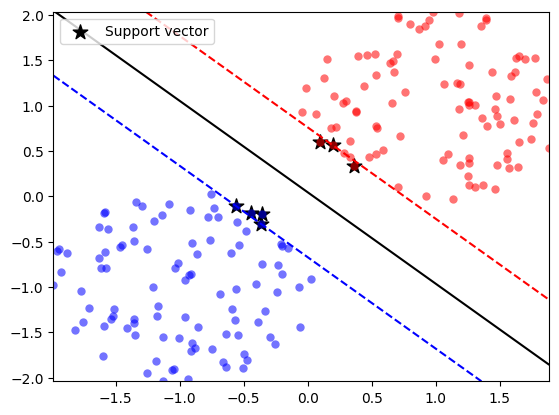

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import MySVM


def gen_circle(n=50, center_x=0, center_y=0, radius=1, label=0):
    
    """
    A simple function that generates circular distribution
    n: number of points (default=50)
    center_x: the center for X (default=0)
    center_y: the center for Y (default=0)
    radius: the radius of circle (default=1)
    """

    # random angle
    alpha = 2 * np.pi * np.random.rand(n)
    # random radius
    r = radius * np.sqrt(np.random.rand(n))
    # calculating coordinates
    x = r * np.cos(alpha) + center_x
    y = r * np.sin(alpha) + center_y

    label = np.ones(n) * label

    return [x, y, label]


if __name__ == '__main__':
    np.random.seed(5)   # to reproduce

    n = 100
    C0 = gen_circle(n, center_x=1, center_y=1, radius=1.05, label=1)
    C1 = gen_circle(n, center_x=-1, center_y=-1, radius=1.05, label=-1)

    x0 = np.append(C0[0], C1[0])
    x1 = np.append(C0[1], C1[1])

    X = np.c_[x0, x1]
    Y = np.append(C0[2], C1[2])

    scaler = StandardScaler()
    train_x = scaler.fit_transform(X)

    model = MySVM.SVM(train_x, Y, C=1, kernel='linear', max_iter=600, tol=1e-5, eps=1e-5)
    # model = MySVM.SVM(train_x, Y, C=1, kernel='rbf', max_iter=600, tol=1e-5, eps=1e-5)
    model.fit()

    train_y = model.predict(train_x)

    print('support vector: {} / {}'\
        .format(len(model.alphas[model.alphas != 0]), len(model.alphas)))
    sv_idx = []
    for idx, alpha in enumerate(model.alphas):
        if alpha != 0:
            print('index = {}, alpha = {:.3f}, predict y={:.3f}'\
                .format(idx, alpha, train_y[idx]))
            sv_idx.append(idx)


    print(f'bias = {model.b}')
    print('training data error rate = {}'.format(len(Y[Y * train_y < 0])/len(Y)))

    ## Draw the Plot
    plt.plot(C0[0], C0[1], 'o', markerfacecolor='r', markeredgecolor='None', alpha=0.55)
    plt.plot(C1[0], C1[1], 'o', markerfacecolor='b', markeredgecolor='None', alpha=0.55)

    resolution = 50
    dx = np.linspace(X[:, 0].min(), X[:, 0].max(), resolution)
    dy = np.linspace(X[:, 1].min(), X[:, 1].max(), resolution)
    dx, dy = np.meshgrid(dx, dy)
    plot_x = np.c_[dx.flatten(), dy.flatten()]

    dz = model.predict(scaler.transform(plot_x))
    dz = dz.reshape(dx.shape)

    plt.contour(dx, dy, dz, alpha=1, colors=('b', 'k', 'r'), \
                levels=(-1, 0, 1), linestyles = ('--', '-', '--'))

    label_cnt = 0
    for i in sv_idx:
        if label_cnt == 0:
            plt.scatter(X[i, 0], X[i, 1], marker='*', color='k', \
                        s=120, label='Support vector')
            label_cnt += 1
            continue

        plt.scatter(X[i, 0], X[i, 1], marker='*', color='k', s=120)

    plt.legend()
    plt.show()